<a href="https://colab.research.google.com/github/abhashjain9/EDA-Hotel-Booking-Analysis/blob/main/Indivdual_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

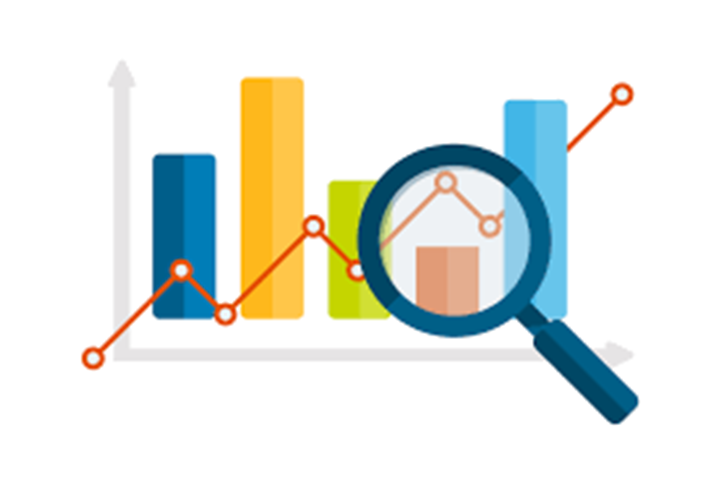
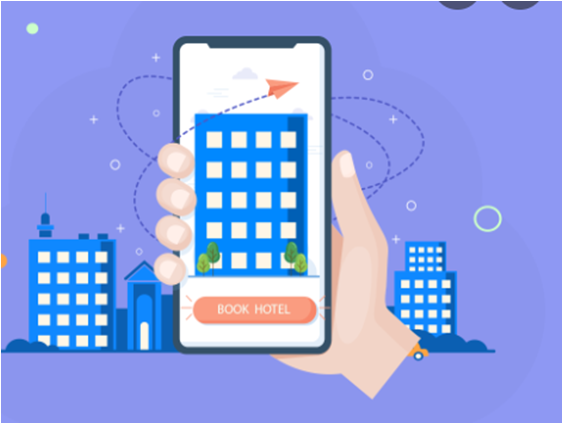

# **Mount the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **First Import necessary packages and import the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast

# Now import and check info of the dataset bold text

In [ ]:
# Read to CSV
file_path='/content/drive/MyDrive/Almabetter/Capstone Project/EDA/Capstone project 1/Hotel Booking Analysis/Hotel Bookings.csv'
data=pd.read_csv(file_path)

In [ ]:
#Check the info of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Data Preprocessing**

In [ ]:
#Copy the dataset
df = data.copy()

## **Data cleaning**

In [ ]:
## Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

                    We have company,agent,country and children with missing values

In [ ]:
# If no id of agent,company is null and or missing children value,just replace it with 0
df[['agent','company','children']] = df[['agent','company','children']].fillna(0.0)
'''
Columns like children, company, and agent, that are float type but their values are only in integers
'''
# convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [ ]:
# For the missing values in the country column, replace it with NA (value that appears most often)
df['country'].fillna('NA', inplace=True)

In [ ]:
#In this data set many rows that have no guests including adults, children and babies and this data rows does not make any impact on analysis
df[(df.adults+df.children+df.babies)==0].shape

(180, 32)

180 such rows that have no guests including adults, children and babies

In [ ]:
# Remove rows that have no adult, baby and children
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

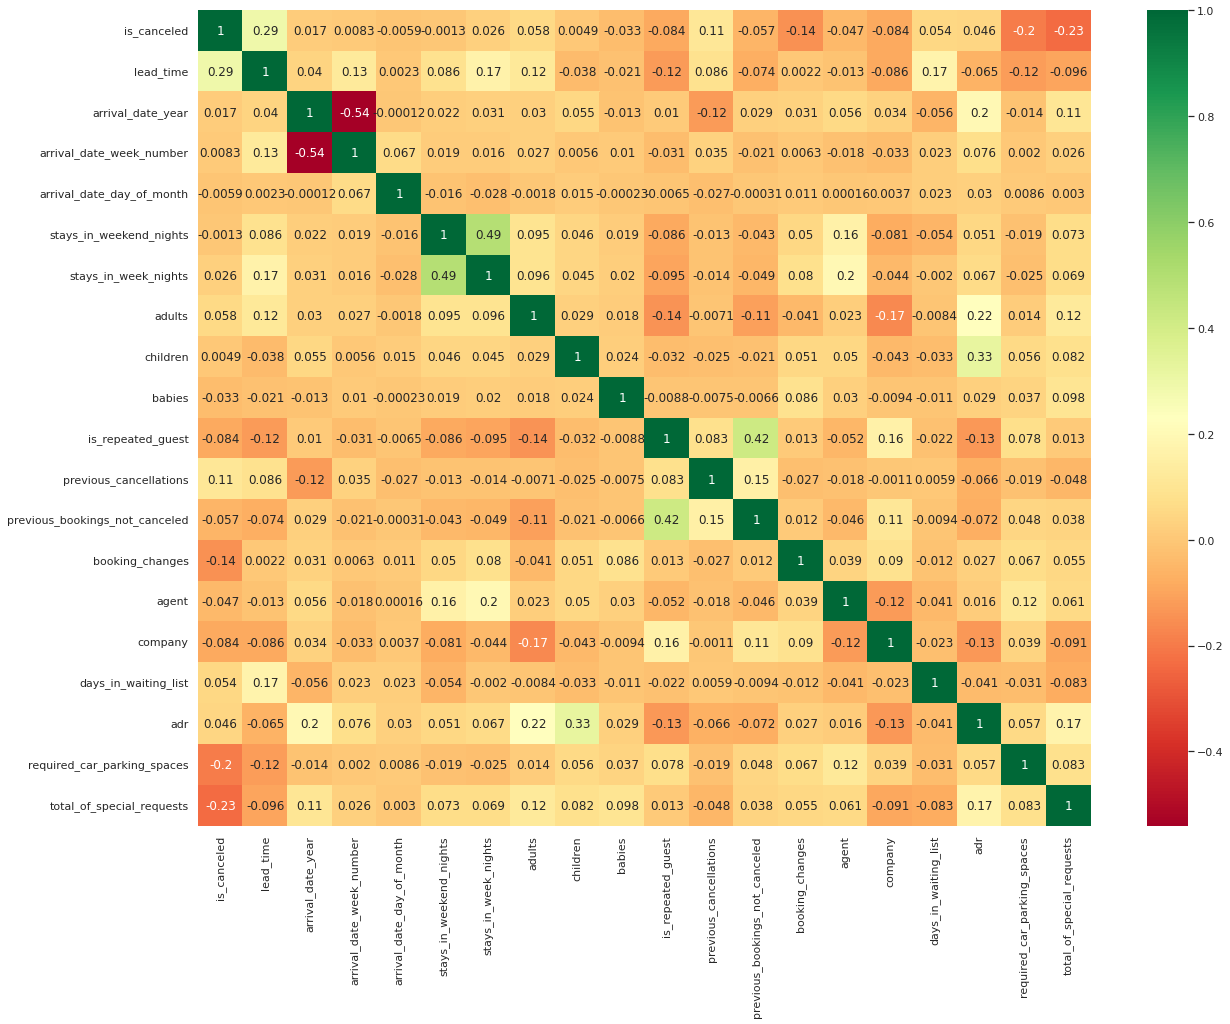

In [ ]:
#Lets see the correlation
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

All in all the numerical data has to pairs of moderately linear correlated features.

# ***Exploratory Data Analysis(EDA)***
extract the information from our data

# **1. How many booking cancelled each year ?**

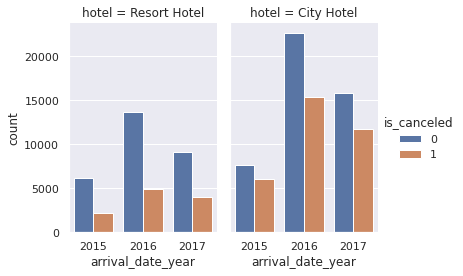

In [ ]:
# Calculate how many booking cancelled each year
df_cancelled=df.groupby(['arrival_date_year','hotel']).agg({'arrival_date_year':'count','is_canceled':'sum'})
#plot the cat chart
sns.set_theme(style="darkgrid")
g = sns.catplot(x="arrival_date_year", hue="is_canceled", col="hotel",
                data=df, kind="count",
                height=4, aspect=.7)


In [ ]:
df_cancelled

arrival_date_year  is_canceled
arrival_date_year hotel                                       
2015              City Hotel                13658         6003
                  Resort Hotel               8309         2138
2016              City Hotel                38059        15396
                  Resort Hotel              18564         4928
2017              City Hotel                27446        11680
                  Resort Hotel              13174         4054

In [ ]:
#Calculate total booking 
total_booking=df_cancelled['arrival_date_year'].sum()

In [ ]:
#Calculate total booking canceled
total_booking_canceled=df_cancelled['is_canceled'].sum()

In [ ]:
print(f'Total booking canceled is {total_booking_canceled} out of total booking {total_booking}.')

Total booking canceled is 44199 out of total booking 119210.


**INFERENCES**

Tolal bookings got canceled 44199 i.e. 37% of total booking. Most of the booking cancelled for City Hotel during the year of 2016 and 2017 that is 61% of total booking canceled .

# **For further analysis,We will consider only those bookings which did not  canceled**

In [ ]:
not_canceled_df = df[df['is_canceled'] == 0]

# 2. What is the booking ratio between weekend and week days nights by hotel?




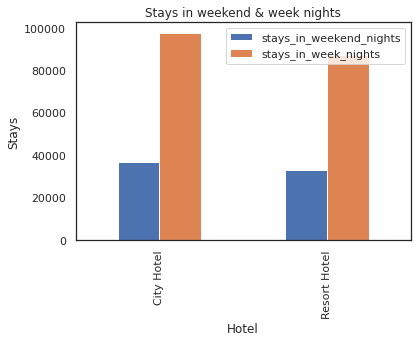

<Figure size 720x576 with 0 Axes>

In [ ]:
#Create datafram for interested colume
stay_df=not_canceled_df[['hotel','stays_in_weekend_nights','stays_in_week_nights']]
#Groupby weekend and week days nights by hotel
stay_df=stay_df.groupby('hotel')[['stays_in_weekend_nights','stays_in_week_nights']].sum()
#set seaborn plotting aesthetics
sns.set(style='white')
#plot the bar chart
stay_df.plot.bar()
# set x label
plt.xlabel("Hotel")
# set y label
plt.ylabel("Stays")
# set legend
plt.legend(loc=1)
# set title of chart
plt.title("Stays in weekend & week nights")
#set fig. size
plt.figure(figsize =(10,8))
#show curve
plt.show()

In [ ]:
stay_df

,stays_in_weekend_nights,stays_in_week_nights
hotel,,
City Hotel,36817,97651
Resort Hotel,32798,87026


**INFERENCES**

Total guest stays in week nights are 184677 in that 97651 stays in City hotel and 87026 stays in resort hotel.
Total guest stays in weekend nights are 69615 in that 36817 stays in City hotel and 32798 stays in resort hotel.

# **3.Top 10 country from most of the gusets come?**

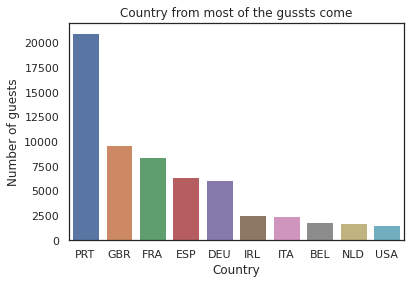

In [ ]:
# find top 10 country from most of the gusets come
gust_df=not_canceled_df['country'].value_counts().reset_index().head(10)
#set seaborn plotting aesthetics
sns.set(style='white')
#create grouped bar chart
sns.barplot(x='index', y='country', data=gust_df)
# set x label
plt.xlabel("Country")
# set y label
plt.ylabel("Number of guests")
# set title
plt.title("Country from most of the gussts come")
# show the plot
plt.show()

**INFERENCES**

PRT, GBR and FRA, ESP and DEU are the top countries from most guests come, approx 70% come from these 5 countries.

In [ ]:
not_canceled_df['country'].value_counts().sum()

75011

# **4.What is the booking percentage between city hotel and resort hotel?**

In [ ]:
#find the booking percentage between hotel type
hotel_booking=not_canceled_df['hotel'].value_counts().reset_index()
hotel_booking

,index,hotel
0,City Hotel,46084
1,Resort Hotel,28927


In [ ]:
#plot the pie chart
fig = px.pie(hotel_booking, values='hotel', names='index', title='Booking between Resort and City Hotel')
#show the plot
fig.show()

**INFERENCES**

More than 60% of the population booked the City hotel

# **5.What are the number of wrong room assigned to gusets with respect  to booked room type by each hotel?**


In [ ]:
def check_assignment(str1,str2):
  '''
  This function check reserved room assigened correct or wrong
  '''
  if str1==str2: # check the condition
    value=0
  else:
    value=1
  return value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



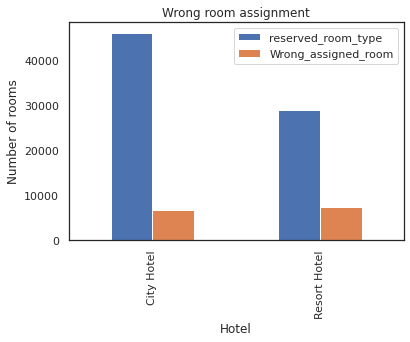

In [ ]:
# create small datafram of intesed columes
assignment_df=not_canceled_df[['hotel','reserved_room_type','assigned_room_type']]
# apply check_assignment function
assignment_df['Wrong_assigned_room']=assignment_df.apply(lambda x:check_assignment(x['reserved_room_type'],x['assigned_room_type']),axis=1)
#group by hotel with room assigned
assignment_df.groupby('hotel').agg({'reserved_room_type':'count','Wrong_assigned_room':'sum'}).plot.bar()
# set x label
plt.xlabel("Hotel")
# set y label
plt.ylabel("Number of rooms")
# set legend
plt.legend(loc=1)
# set title
plt.title("Wrong room assignment")
# show the plot
plt.show()

In [ ]:
assignment_df.groupby('hotel').agg({'reserved_room_type':'count','Wrong_assigned_room':'sum'})

,reserved_room_type,Wrong_assigned_room
hotel,,
City Hotel,46084,6661
Resort Hotel,28927,7334


**INFERENCES**

In resort hotel 7334 room assigned wrong i.e 25.4% of total reserved room type in resort hotel.
In city hotel 6661 room assigned wrong i.e 14.5% of total reserved room type in city hotel.


# 6. What is the percentage of booking every year?

In [ ]:
#Calculate number of booking per year
hotel_booking_year=df['arrival_date_year'].value_counts().sort_index().reset_index()
hotel_booking_year

,index,arrival_date_year
0,2015,21967
1,2016,56623
2,2017,40620


In [ ]:
# plot pie chart for percentage of booking every year
fig = px.pie(hotel_booking_year, values='arrival_date_year', names='index', title='Percentage of booking every year')
#show the pie chart
fig.show()

**INFERENCES**

More bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 14% the next year.

# 7. Most booked accommodation type like as adults,children and babies

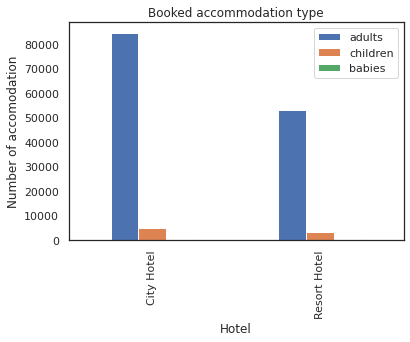

<Figure size 720x504 with 0 Axes>

In [ ]:
# create small datafram of intrested data
accommodation_df=not_canceled_df[['hotel','adults','children','babies']]
# apply groupby function
accommodation_df.groupby('hotel').agg({'adults':'sum','children':'sum','babies':'sum'}).plot.bar()
#set x label
plt.xlabel("Hotel")
#set y label
plt.ylabel("Number of accomodation")
#set legend
plt.legend(loc=1)
# set title
plt.title("Booked accommodation type")
#set size of figure
plt.figure(figsize =(10, 7))
#show plot
plt.show()

**INFERENCES**

More bookings were made by adults in both city hotel and resort hotel only one booking made up with babies in resort hotel.

# 8. Which is the most occupied month for hotels?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



January      4115
February     5359
March        6620
April        6560
May          7103
June         6395
July         7907
August       8624
September    6385
October      6901
November     4651
December     4391
Name: arrival_date_month, dtype: int64


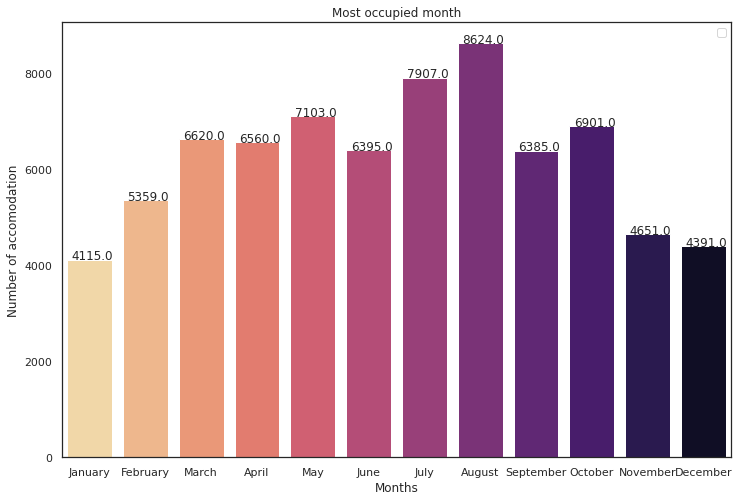

<Figure size 720x504 with 0 Axes>

In [ ]:
# create list of months
ind=['January','February','March','April', 'May','June','July','August','September','October',
     'November', 'December']
#count hotel montthly booking
hotel_monthly_bookings=not_canceled_df['arrival_date_month'].value_counts().reindex(ind)
print(hotel_monthly_bookings)
hotel_bookings=hotel_monthly_bookings.values
months=hotel_monthly_bookings.index
arrival_month_df=not_canceled_df['arrival_date_month']
#plot the chart
plt.figure(figsize=(12,8))
ax=sns.barplot(months,hotel_bookings,palette='magma_r')
for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x()+0.08, p.get_height()+0.01))
#set x label
plt.xlabel("Months")
#set y label
plt.ylabel("Number of accomodation")
# set legend
plt.legend(loc=1)
# set title
plt.title("Most occupied month")
#set fig. size
plt.figure(figsize =(10, 7))
#show plot
plt.show()


**INFERENCES**

As we can see from  analysis most bookings were made from July to August. And the least bookings were made at the start and end of the year.

# **9.Which is the most booking market segment for hotel?**

In [ ]:
# create small datafram of intrested data
market_segment=not_canceled_df['market_segment']
#value count of booking according to market segment
market_segment=market_segment.value_counts().reset_index()
#plot the pie chart
fig = px.pie(market_segment, values='market_segment', names='index', title='Market Segment')
fig.show()

**INFERENCES**

As we can see from analysis most bookings were made by online TA market segment. And the least bookings were made by aviation and complementary market segment.

# **10. How many guest repeated  each year?**

In [ ]:
# create small datafram of intrested data
repeated_guest=not_canceled_df[['arrival_date_year','is_repeated_guest']]
# apply group by
repeated_guest=repeated_guest.groupby('arrival_date_year')['is_repeated_guest'].sum().reset_index()
repeated_guest

,arrival_date_year,is_repeated_guest
0,2015,280
1,2016,1619
2,2017,1306


In [ ]:
#plot the pie chart
fig = px.pie(repeated_guest, values='is_repeated_guest', names='arrival_date_year', title='Repeated Guest')
fig.show()

**INFERENCES**

More repeated guest bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 10% the next year.

# **Conclusion:**

We first decided to take up this project solely due to our mutual interest in hotel booking.Then we decided first work individually gaining insights doing some eda etc.I started to form the questions and we discussed with team member.After doing some random EDAs.I gained some confidence.

We used the give dataset that contains data about hotel bookings between 2015-2017 like booking canelled,booking chanels,booking date etc.
We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract information from the data to answer the following questions.


1.   How many booking cancelled each year ?
2.   What is the booking ratio between weekend and week days nights by hotel?
3.   Top 10 countries from most of the gusets come?
4.   What is the booking percentage between city hotel and resort hotel?

1.   What are the number of wrong room assigned to gusets with respect  to booked room type by each hotel?

1.  What is the percentage of booking every year?
2.   Most booked accommodation type like as adults,children and babies.


8.   Which is the most occupied month for hotels?

1.  Which is the most booking market segment for hotel? 
2.   How many guest repeated  each year?









**SUMMARY**


1.   Total bookings got canceled 44199 i.e. 37% of total booking. Most of the booking cancelled for City Hotel during the year of 2016 and 2017 that is 61% of total booking canceled.

1.   PRT, GBR and FRA, ESP and DEU are the top countries from most guests come, approx 70% come from these 5 countries.
2.   More than 60% of the population booked the City hotel.

1.   In resort hotel 7334 room assigned wrong i.e 25.4% of total reserved room type in resort hotel. In city hotel 6661 room assigned wrong i.e 14.5% of total reserved room type in city hotel.
2.   More bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 14% the next year.

1.   More bookings were made by adults in both city hotel and resort hotel.So hotels can make arrangement plans accordingly.
2.   Most bookings were made from July to August. And the least bookings were made at the start and end of the year.

1.  Most bookings were made by online TA market segment. And the least bookings were made by aviation and complementary market segment.
2.   More repeated guest bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 10% the next year.











## **Challenges**

(1) Data was present in wrong data type format.

(2) Choosing appropriate visualization techniques to use was difficult.

(3) A lot of null values were there in the dataset.